In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In This Project I am going to Analyse my transcations made on Monzo Mobile Banking App, and would like to find the trends and relations in my spending the money. Also would like to see on Which category i spend the most what was my higesht and lowest transcation made how much i spent overall and many more.
I have accuquired the data from my personal banking account. 

In [104]:
transaction_data = pd.read_csv("/Users/dhanrajtentu/Downloads/Projects/Monzo Transaction Analysis/Monzo Transactions - Personal Account Transactions.csv")

In [105]:
transaction_data.head()

,Transaction ID,Date,Time,Type,Name,Emoji,Category,Amount,Currency,Local amount,Local currency,Notes and #tags,Address,Receipt,Description,Category split
0,tx_0000Acpn3GgBhB8OdiuowD,15/12/2023,13:02:31,Faster payment,Dhanraj Tentu,NaN,Transfers,1.0,GBP,1.0,GBP,Monzo-BRMYL,NaN,NaN,Monzo-BRMYL,NaN
1,tx_0000AcqcwasdO0Te8YV517,15/12/2023,22:43:58,Faster payment,Dhanraj Tentu,NaN,Transfers,5.0,GBP,5.0,GBP,Monzo-LJKZM,NaN,NaN,Monzo-LJKZM,NaN
2,tx_0000ActhRlkK1H3GQgRDFa,17/12/2023,10:18:34,Faster payment,Dhanraj Tentu,NaN,Transfers,6.0,GBP,6.0,GBP,Monzo-CHZXY,NaN,NaN,Monzo-CHZXY,NaN
3,tx_0000ActnkpGtjgVHMklEcl,17/12/2023,11:29:14,Card payment,Transport for London,🚆,Transport,-9.4,GBP,-9.4,GBP,"Travel charge for Sunday, 17 Dec","Windsor House, 42-50 Victoria Street",NaN,TfL Travel Charge TFL.gov.uk/CP GBR,NaN
4,tx_0000Actnkt01sKvWmLorKM,17/12/2023,11:29:15,signup_referral,NaN,NaN,Income,5.0,GBP,5.0,GBP,NaN,NaN,NaN,Referral bonus 🎉,NaN


In [106]:
#print the last five rows of the data
transaction_data.tail()

,Transaction ID,Date,Time,Type,Name,Emoji,Category,Amount,Currency,Local amount,Local currency,Notes and #tags,Address,Receipt,Description,Category split
793,tx_0000AvXOAdTqCmd13FXtBp,26/06/2025,23:28:51,Monzo-to-Monzo,Vamshi Dantapally,NaN,General,-282.00,GBP,-282.00,GBP,Rent and Asda,NaN,NaN,NaN,NaN
794,tx_0000AvbZiFU5nuTcUnVPYA,28/06/2025,23:57:01,Monzo-to-Monzo,Vamshi Dantapally,NaN,General,115.20,GBP,115.20,GBP,Asda,NaN,NaN,NaN,NaN
795,tx_0000Avdw5oNUp68CFYrLnt,30/06/2025,03:17:13,Direct Debit,Jaja Finance Ltd,NaN,Bills,-32.07,GBP,-32.07,GBP,00008368811III9871,NaN,NaN,00008368811III9871,NaN
796,tx_0000Avg5f0aUhuzWyvaXw1,01/07/2025,04:13:51,overdraft,NaN,NaN,General,-4.83,GBP,-4.83,GBP,This is the charge for your June 2025 overdraft,NaN,NaN,June overdraft fees,NaN
797,tx_0000AvgKaTx7bIP5hfQuX3,01/07/2025,07:01:06,Monzo Paid,Max,⭐,Bills,-17.00,GBP,-17.00,GBP,NaN,NaN,NaN,Max refund,NaN


In [107]:
transaction_data.isna().sum() # Check for Na values

Transaction ID       0
Date                 0
Time                 0
Type                 0
Name                26
Emoji              545
Category             0
Amount               0
Currency             0
Local amount         0
Local currency       0
Notes and #tags    392
Address            604
Receipt            798
Description        201
Category split     798
dtype: int64

In [108]:
transaction_data.shape

(798, 16)

In [109]:
transaction_data.drop(columns= {'Address','Emoji',"Receipt","Description",'Category split'}, inplace=True)

# Removed the columns which felt unnecessary, Also most of the values are Null, won't be able to analyse properly with the null values either.

In [110]:
transaction_data.columns

Index(['Transaction ID', 'Date', 'Time', 'Type', 'Name', 'Category', 'Amount',
       'Currency', 'Local amount', 'Local currency', 'Notes and #tags'],
      dtype='object')

In [111]:
transaction_data.info() # Get the type also check if there is any null space

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Transaction ID   798 non-null    object 
 1   Date             798 non-null    object 
 2   Time             798 non-null    object 
 3   Type             798 non-null    object 
 4   Name             772 non-null    object 
 5   Category         798 non-null    object 
 6   Amount           798 non-null    float64
 7   Currency         798 non-null    object 
 8   Local amount     798 non-null    float64
 9   Local currency   798 non-null    object 
 10  Notes and #tags  406 non-null    object 
dtypes: float64(2), object(9)
memory usage: 68.7+ KB


In [112]:
transaction_data.describe(include= 'all')

# 1. It can be observed that there are 9 unique type of payments in the data
# 2. Only the amount is in GBP.
# 3. Also there are 16 category of payments.

,Transaction ID,Date,Time,Type,Name,Category,Amount,Currency,Local amount,Local currency,Notes and #tags
count,798,798,798,798,772,798,798.000000,798,798.000000,798,406
unique,798,298,796,9,91,16,NaN,1,NaN,4,215
top,tx_0000Acpn3GgBhB8OdiuowD,11/07/2024,08:41:10,Faster payment,TENTU D,Transfers,NaN,GBP,NaN,GBP,Dhanraj Tentu
freq,1,12,2,288,161,248,NaN,798,NaN,784,44
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.199987,NaN,-0.511366,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,194.147160,NaN,194.298542,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,-1000.000000,NaN,-1000.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,-18.000000,NaN,-20.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,-2.000000,NaN,-2.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,11.000000,NaN,11.000000,NaN,NaN


In [113]:
# transaction_data = transaction_data.drop(columns= {'Currency', "Local amount", "Local currency", "Notes and #tags"}) 

In [114]:
# Let's get the Counts
type_counts = transaction_data['Type'].value_counts().reset_index()

name_counts = transaction_data['Name'].value_counts().reset_index()

category_counts = transaction_data['Category'].value_counts().reset_index()


In [115]:
# Convert the date object to date time format
transaction_data['Date'] = pd.to_datetime(transaction_data['Date'], dayfirst=True)
transaction_data = transaction_data.sort_values(by='Date', ascending=False)
print(transaction_data['Date'].dtype)

datetime64[ns]


In [116]:
transaction_data.nunique()

Transaction ID     798
Date               298
Time               796
Type                 9
Name                91
Category            16
Amount             405
Currency             1
Local amount       400
Local currency       4
Notes and #tags    215
dtype: int64

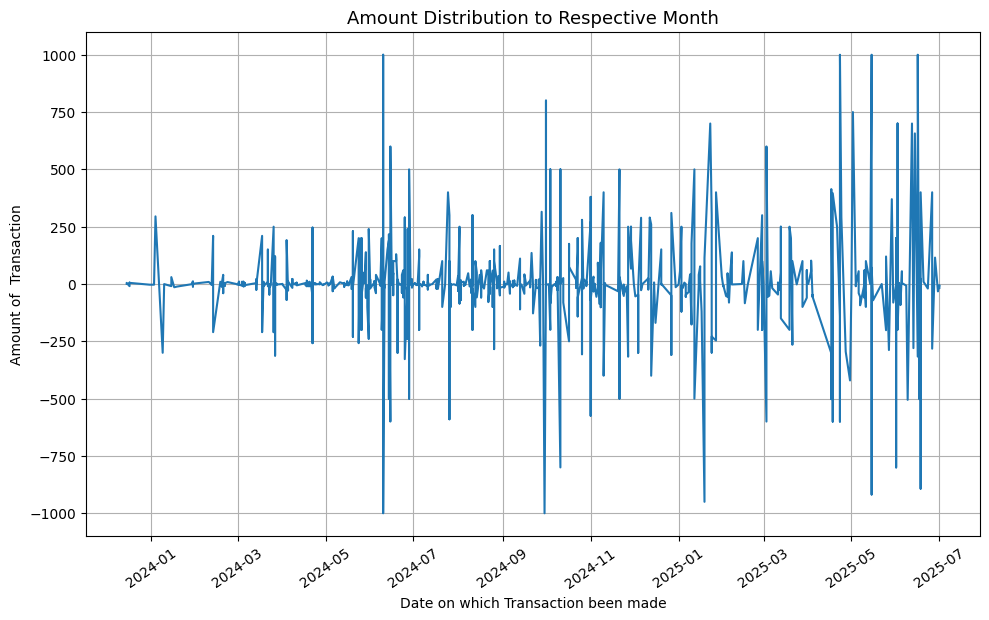

In [117]:
# Let's the relation b\w time and amount
plt.figure(figsize=(10,6))
plt.plot(transaction_data['Date'], transaction_data['Amount'])
plt.xlabel("Date on which Transaction been made")
plt.ylabel("Amount of  Transaction")
plt.title('Amount Distribution to Respective Month', fontdict={"fontsize": 13, "fontweight": 'roman'})
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation = 35)
plt.show()

         Month   Category  Count
0   2023-12-01      Bills      1
1   2023-12-01     Income      1
2   2023-12-01  Transfers      3
3   2023-12-01  Transport      1
4   2024-01-01      Bills      2
..         ...        ...    ...
144 2025-06-01    General     11
145 2025-06-01     Income      2
146 2025-06-01  Transfers      9
147 2025-07-01      Bills      1
148 2025-07-01    General      1

[149 rows x 3 columns]


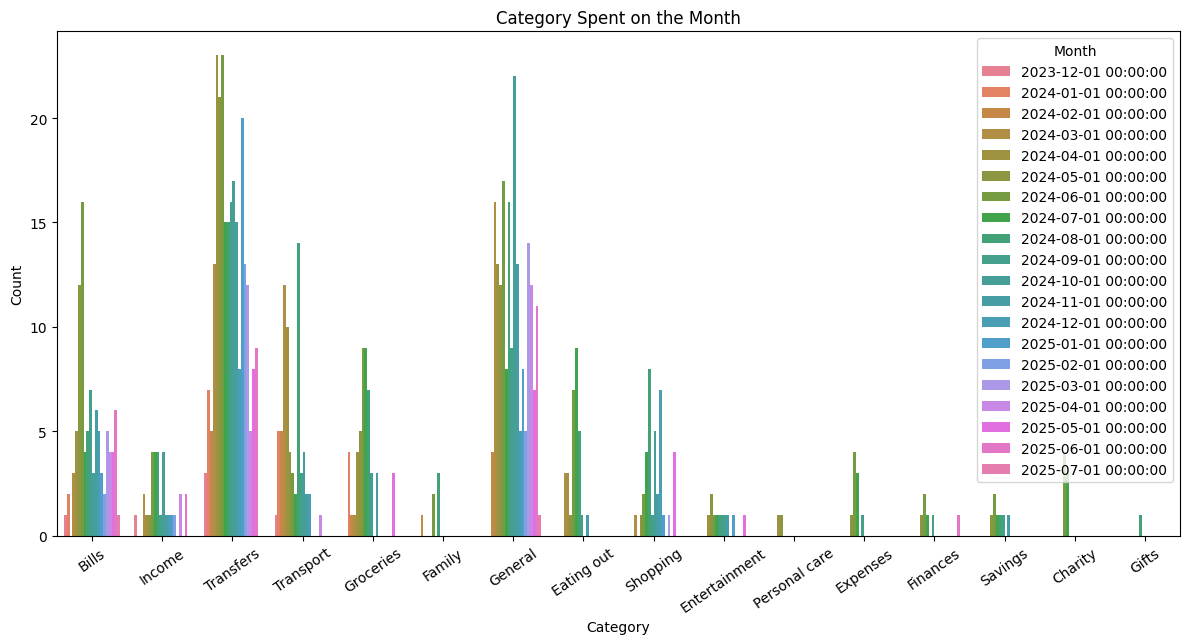

In [118]:
# Add new month column
transaction_data['Month'] = transaction_data['Date'].dt.to_period("M").dt.to_timestamp()

# Group transaction_data with category
category_month = transaction_data.groupby(['Month', "Category"]).size().reset_index(name = 'Count')
print(category_month)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data= category_month, x = 'Category', y = 'Count', hue='Month')
plt.title("Category Spent on the Month")
plt.xlabel("Category")
plt.ylabel("Count")
plt.tight_layout()
plt.xticks(rotation = 35)
plt.show()

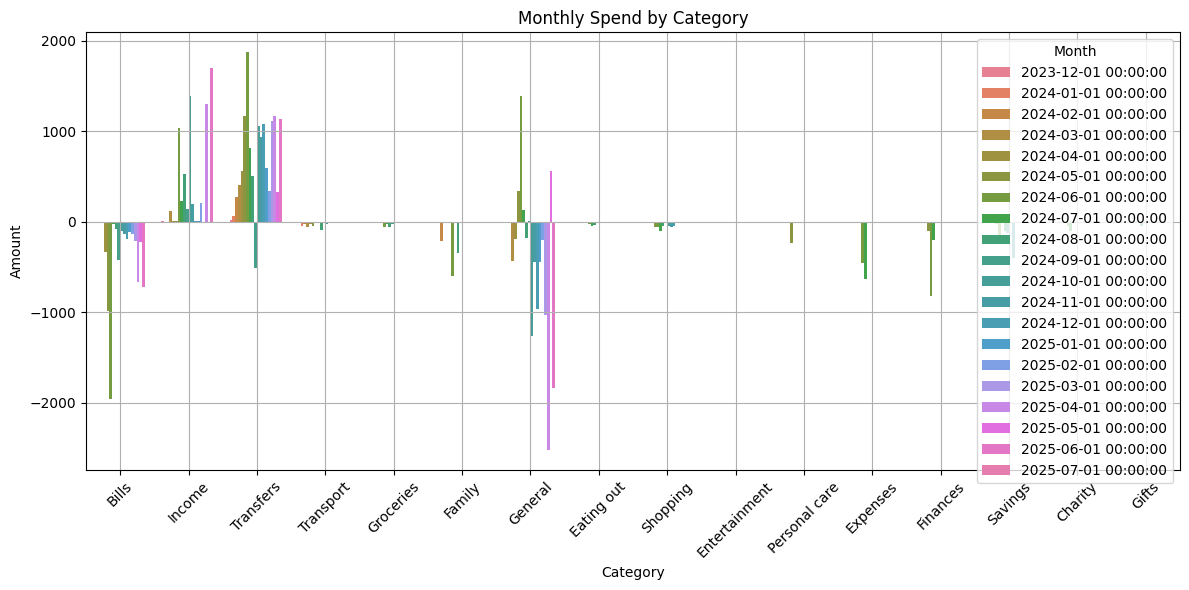

In [119]:
#create a group with the amount of money spent on each category 
grouped = transaction_data.groupby(['Month', 'Category'])['Amount'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=grouped, x='Category', y='Amount', hue='Month')
plt.title("Monthly Spend by Category")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


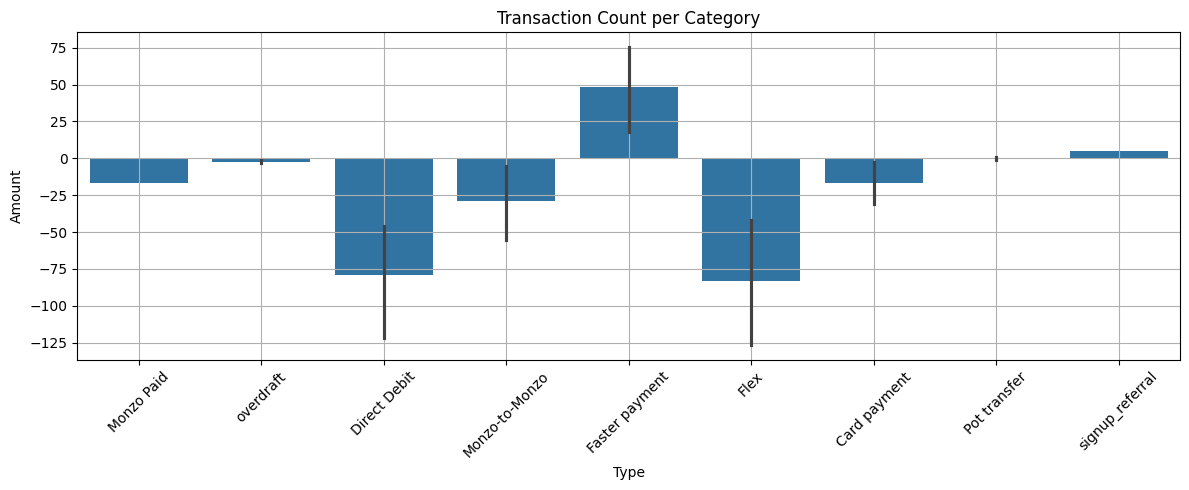

In [120]:

plt.figure(figsize=(12, 5))
sns.barplot(data=transaction_data, y='Amount', x='Type')
plt.title("Transaction Count per Category")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

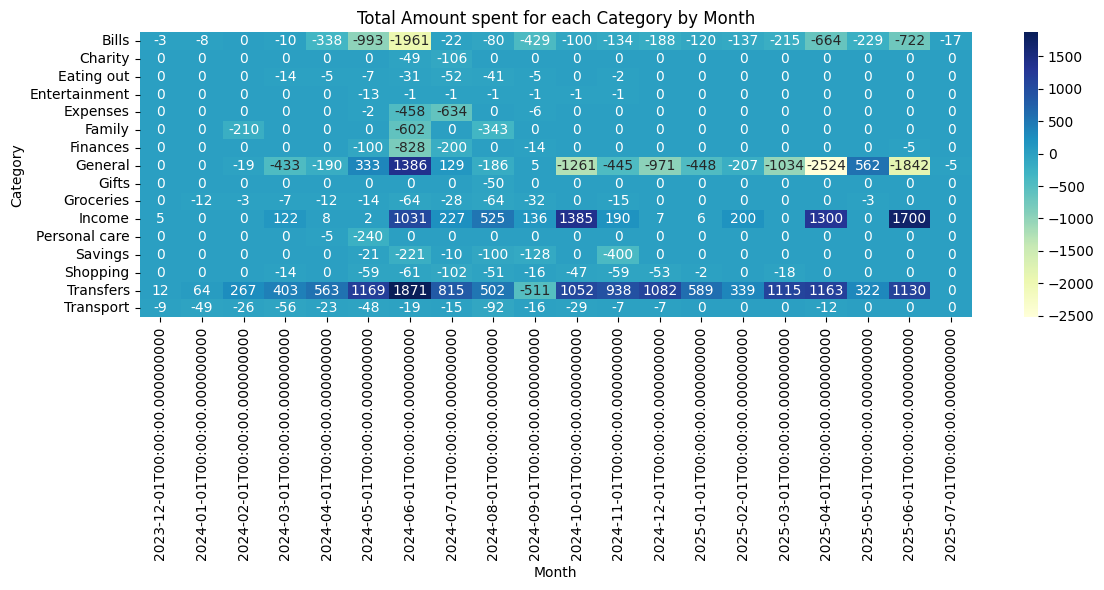

In [121]:

# plot a heat map between Category and month wiht the amount

pivot = transaction_data.pivot_table( # create a pivot table with the data
    index = 'Category',
    columns = 'Month',
    values = 'Amount',
    aggfunc = 'sum',
    fill_value= 0  # this will help remove the Null values
)
pivot

#plot
plt.figure(figsize = (12,6))
sns.heatmap(pivot, cmap='YlGnBu', annot = True, fmt='.0f')
plt.title("Total Amount spent for each Category by Month")
plt.tight_layout()
plt.show()


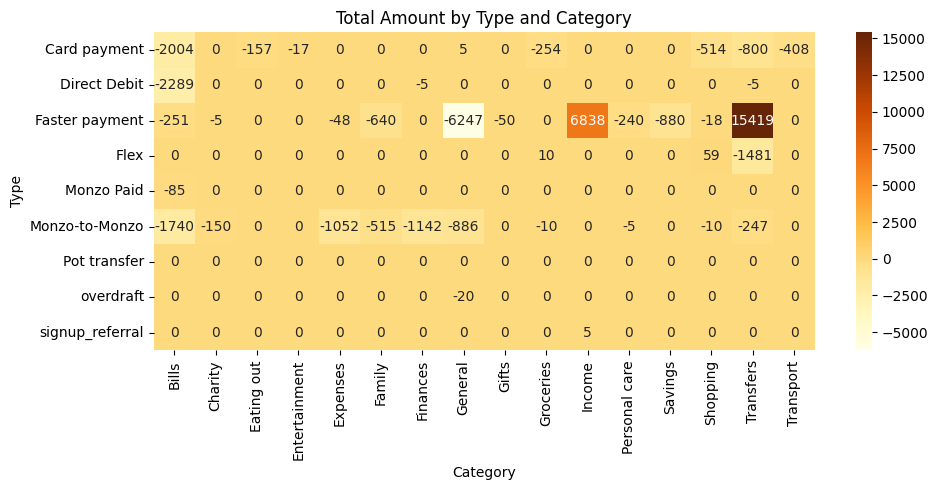

In [122]:
# Count of transactions per type/category
pivot2 = transaction_data.pivot_table(
    index='Type', 
    columns='Category', 
    values='Amount', 
    aggfunc='sum', 
    fill_value=0
)

plt.figure(figsize=(10, 5))
sns.heatmap(pivot2, cmap="YlOrBr", annot=True, fmt=".0f")
plt.title("Total Amount by Type and Category")
plt.tight_layout()
plt.show()

In [123]:
transaction_data.columns

Index(['Transaction ID', 'Date', 'Time', 'Type', 'Name', 'Category', 'Amount',
       'Currency', 'Local amount', 'Local currency', 'Notes and #tags',
       'Month'],
      dtype='object')

In [124]:
# Sort top 10 values by Amount in decending order
top_10_transactions = transaction_data.sort_values(by='Amount', ascending=False).head(10)

#Display the top 10
print("Top 10 Largest Transactions Made: " + '\n')
display(top_10_transactions[['Date', "Name", "Type", "Category", "Amount",]])

Top 10 Largest Transactions Made: 



,Date,Name,Type,Category,Amount
757,2025-05-15,Anil Mallarapu,Monzo-to-Monzo,General,1000.0
235,2024-06-10,University of Greenwich,Card payment,Bills,1000.0
735,2025-04-23,V Nadiminiti,Faster payment,Income,1000.0
231,2024-06-10,V Nadiminiti,Faster payment,Income,1000.0
785,2025-06-16,V Nadiminiti,Faster payment,Income,1000.0
503,2024-10-01,S Gunugurthi,Faster payment,Income,800.0
741,2025-05-02,TENTU D,Faster payment,Transfers,750.0
655,2025-01-23,TENTU D,Faster payment,Transfers,700.0
781,2025-06-12,TENTU D,Faster payment,Transfers,700.0
772,2025-06-02,S Gunugurthi,Faster payment,Income,700.0


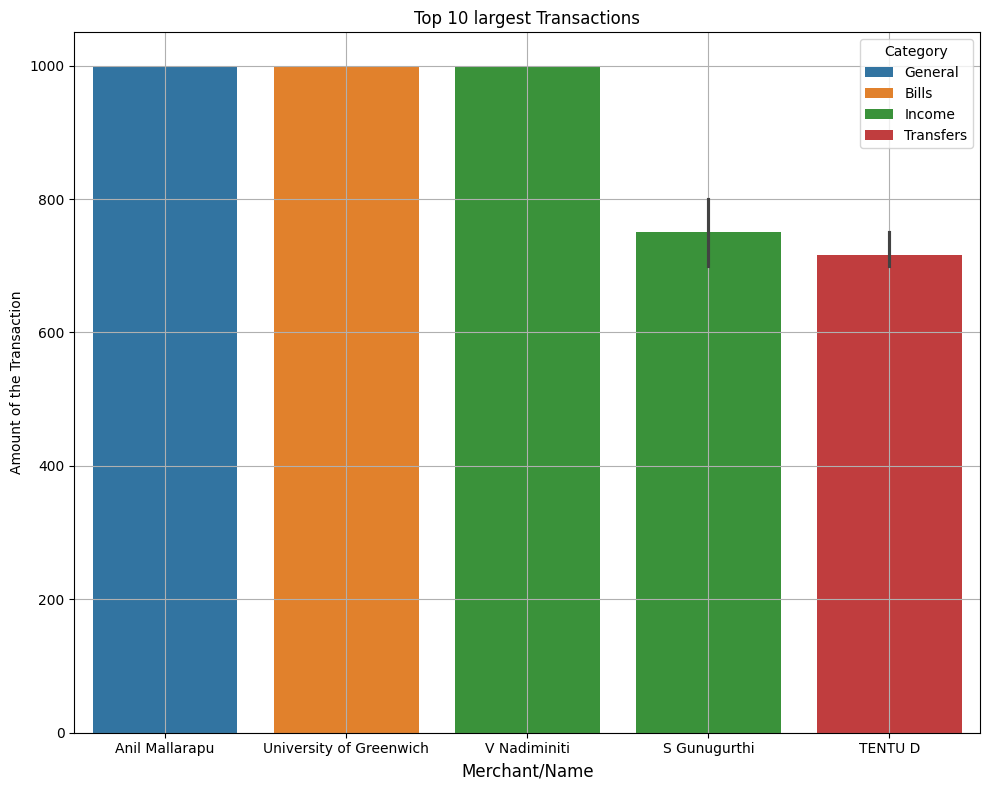

In [125]:
# plot
plt.figure(figsize=(10,8))
sns.barplot(data = top_10_transactions, x= 'Name', y='Amount',hue='Category', dodge=False)
plt.title("Top 10 largest Transactions", size = 12)
plt.xlabel('Merchant/Name', size = 12)
plt.ylabel('Amount of the Transaction')
plt.grid(True)
plt.tight_layout()
plt.show()

Category
Bills            -6368.84
Charity           -155.00
Eating out        -156.54
Entertainment      -17.33
Expenses         -1100.80
Family           -1155.00
Finances         -1146.62
General          -7149.31
Gifts              -50.00
Groceries         -254.43
Income            6843.43
Personal care     -245.00
Savings           -880.07
Shopping          -482.18
Transfers        12885.40
Transport         -408.12
Name: Amount, dtype: float64


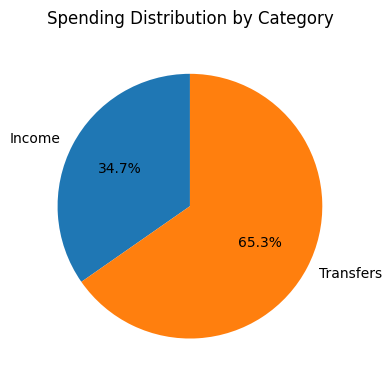

In [126]:
# Group by category and sum the amounts
category_spend = transaction_data.groupby('Category')['Amount'].sum()
print(category_spend)

# Filter out positive amounts (if any are refunds or income)
category_spend = category_spend[category_spend > 0]

# Plot pie chart
plt.figure(figsize=(4, 4))
plt.pie(category_spend, labels=category_spend.index, autopct='%1.1f%%', startangle=90)
plt.title("Spending Distribution by Category")
plt.axis('equal')  # Equal aspect ratio to make it a perfect circle
plt.tight_layout()
plt.show()


/var/folders/2z/q1dh9xf94t90cdmnnxxh8pv80000gn/T/ipykernel_4000/2354775308.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spending_data['Cumulative Spend'] = spending_data['Amount'].cumsum().abs()


,Name,Type,Amount,Category,Cumulative Spend
794,Vamshi Dantapally,Monzo-to-Monzo,115.2,General,115.20
792,TENTU D,Faster payment,400.0,Transfers,515.20
790,TENTU D,Faster payment,10.0,Transfers,525.20
788,TENTU D,Faster payment,400.0,Transfers,925.20
789,TENTU D,Faster payment,23.0,Transfers,948.20
...,...,...,...,...,...
8,Dhanraj Tentu,Faster payment,15.0,Transfers,36432.71
4,NaN,signup_referral,5.0,Income,36437.71
2,Dhanraj Tentu,Faster payment,6.0,Transfers,36443.71
1,Dhanraj Tentu,Faster payment,5.0,Transfers,36448.71


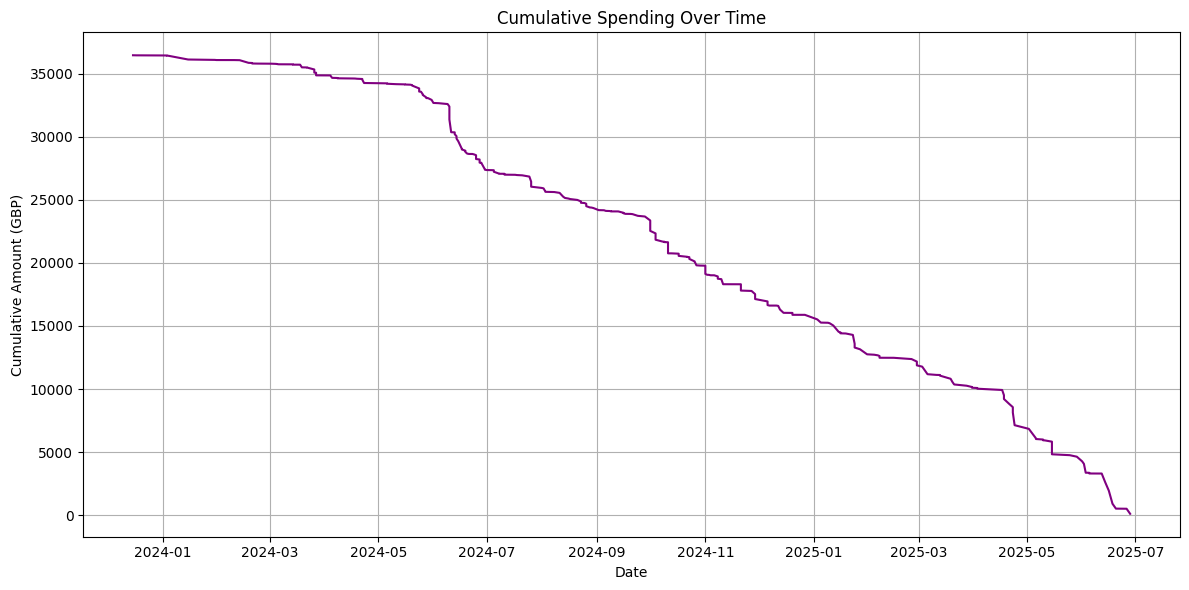

In [127]:
# Filter for only spending transactions (exclude income or refunds if needed)
spending_data = transaction_data[transaction_data['Amount'] > 0]  # or '< 0' depending on how Monzo shows expenses

# Calculate cumulative spend
spending_data['Cumulative Spend'] = spending_data['Amount'].cumsum().abs()
display(spending_data[['Name', 'Type', 'Amount', 'Category', "Cumulative Spend"]])
# Plot cumulative spend over time
plt.figure(figsize=(12, 6))
plt.plot(spending_data['Date'], spending_data['Cumulative Spend'], color='purple')
plt.title("Cumulative Spending Over Time")
plt.xlabel("Date")
plt.ylabel("Cumulative Amount (GBP)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [128]:
# Let us find the outliers

Q1 = transaction_data['Amount'].quantile(0.25) # gives 25th percentile
Q3 = transaction_data['Amount'].quantile(0.75)
IQR = Q3 - Q1

# Define the boundries

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
outliers = transaction_data[(transaction_data['Amount'] < lower_bound) | (transaction_data['Amount'] > upper_bound)]
# Display them
print("Outlier Transactions:")
display(outliers[['Date', 'Name', 'Amount', 'Category', 'Type']])

Outlier Transactions:


,Date,Name,Amount,Category,Type
794,2025-06-28,Vamshi Dantapally,115.20,General,Monzo-to-Monzo
793,2025-06-26,Vamshi Dantapally,-282.00,General,Monzo-to-Monzo
792,2025-06-26,TENTU D,400.00,Transfers,Faster payment
788,2025-06-18,TENTU D,400.00,Transfers,Faster payment
787,2025-06-18,Aqua,-892.47,General,Faster payment
...,...,...,...,...,...
61,2024-03-18,TENTU D,210.00,Transfers,Faster payment
28,2024-02-13,Anil Mallarapu,-210.00,Family,Monzo-to-Monzo
27,2024-02-13,TENTU D,210.00,Transfers,Faster payment
10,2024-01-09,Dhanraj Tentu,-300.00,Transfers,Faster payment


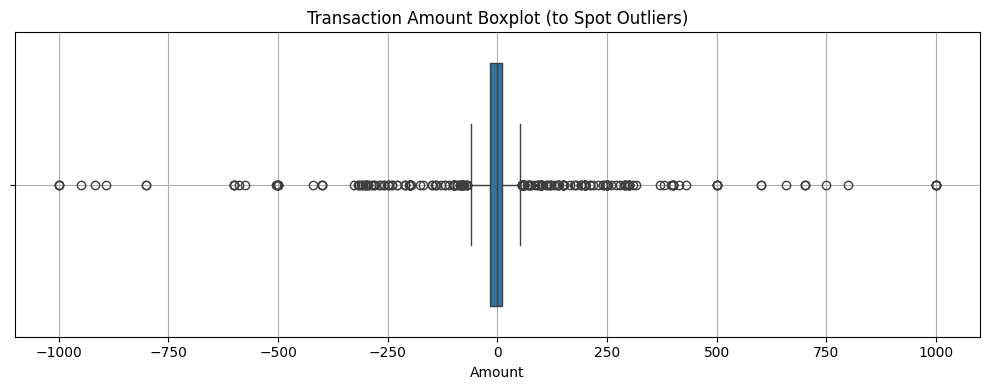

In [129]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=transaction_data['Amount'])
plt.title("Transaction Amount Boxplot (to Spot Outliers)")
plt.grid(True)
plt.tight_layout()
plt.show()
